In [1]:
import pandas as pd
from PIL import Image, ImageChops

from nircoloring.config import get_dataset_image_file
from nircoloring.dataset.caltech import load_filenames, load_metadata

In [2]:
metadata = load_metadata()
filenames = load_filenames()
filenames_set = set(filenames)
image_meta_data = list(filter(lambda image: image["file_name"] in filenames_set, metadata["images"]))

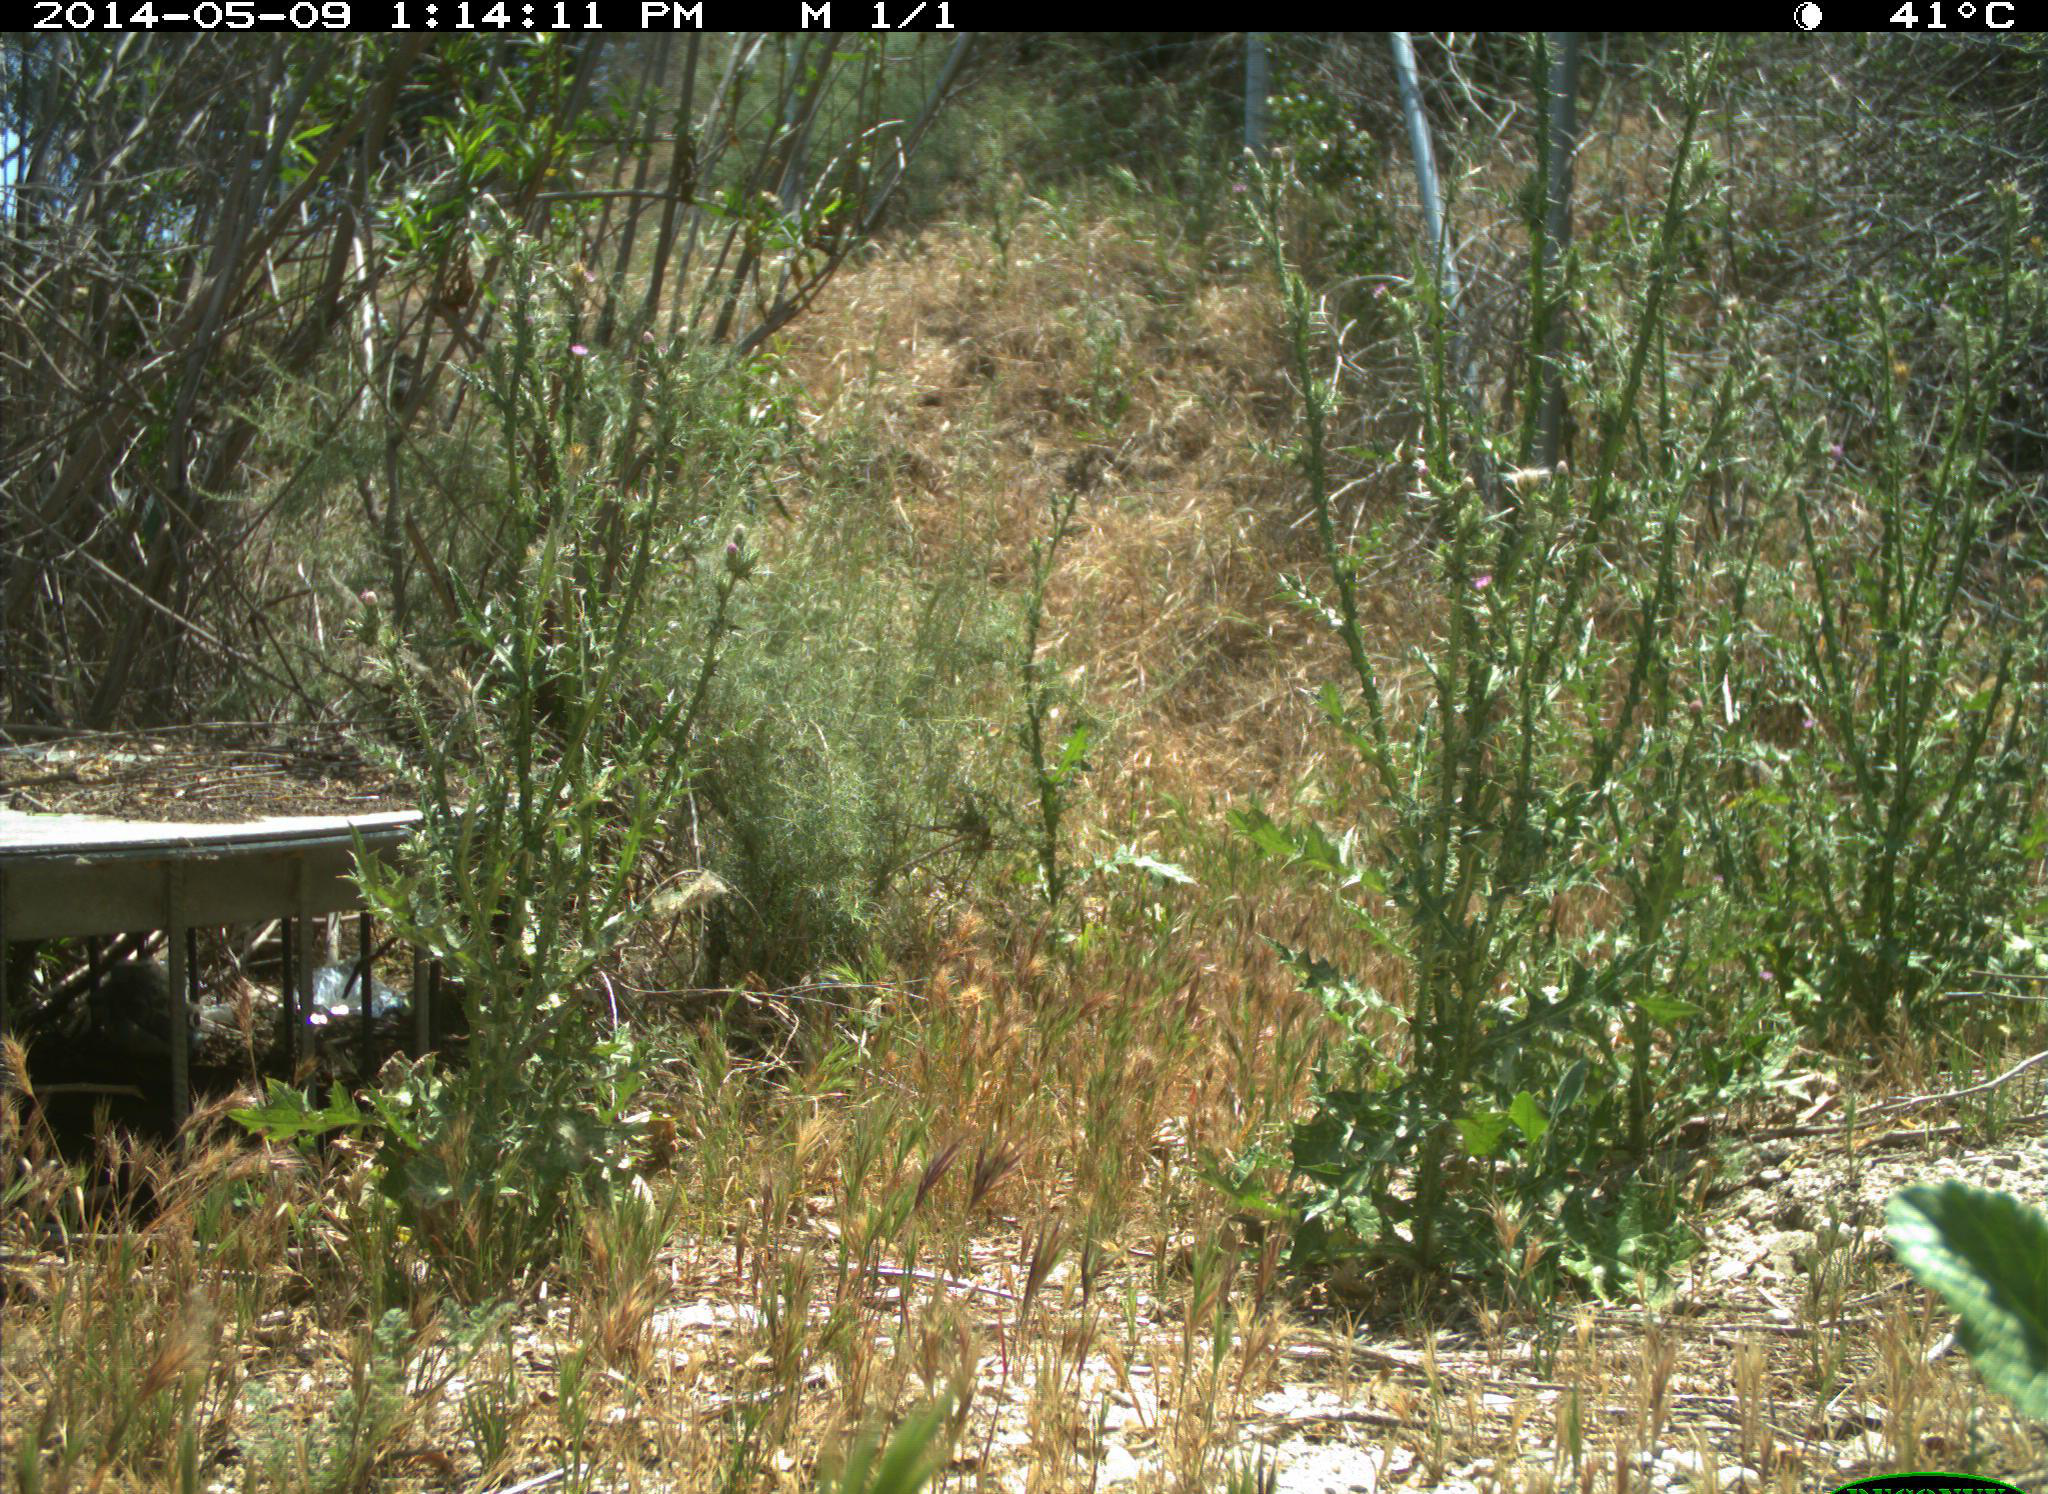

In [3]:
Image.open(get_dataset_image_file(filenames[0]))

In [4]:
def is_nir_image(filename):
    img = load_image_without_frame(filename)
    r, g, b = img.split()
    return ImageChops.difference(r, g).getbbox() is None and ImageChops.difference(g, b).getbbox() is None

def load_image_without_frame(filename):
    img = Image.open(get_dataset_image_file(filename))
    img = img.crop((0, 30, img.size[0], img.size[1] - 30))
    return img

In [5]:
def get_dimensions(filename):
    img = Image.open(get_dataset_image_file(filename))
    return f"{img.size[0]}x{img.size[1]}"

In [6]:
df = pd.DataFrame()
df["filename"] = pd.array(filenames)
df["is_nir"] = df.apply(lambda row: is_nir_image(row["filename"]), axis=1)
df["dim"] = df.apply(lambda row: get_dimensions(row["filename"]), axis=1)
df

filename  is_nir        dim
0    590b9cec-23d2-11e8-a6a3-ec086b02610b.jpg   False  2048x1494
1    58bd1bdc-23d2-11e8-a6a3-ec086b02610b.jpg   False  2048x1494
2    590ebd67-23d2-11e8-a6a3-ec086b02610b.jpg   False  2048x1494
3    5865e3b3-23d2-11e8-a6a3-ec086b02610b.jpg   False  2048x1536
4    59c17a47-23d2-11e8-a6a3-ec086b02610b.jpg   False  2048x1494
..                                        ...     ...        ...
995  59af989c-23d2-11e8-a6a3-ec086b02610b.jpg   False  2048x1494
996  587b7cf4-23d2-11e8-a6a3-ec086b02610b.jpg   False  2048x1494
997  59adfcff-23d2-11e8-a6a3-ec086b02610b.jpg    True  2048x1494
998  5879d2a6-23d2-11e8-a6a3-ec086b02610b.jpg    True  2048x1494
999  594e7848-23d2-11e8-a6a3-ec086b02610b.jpg    True  2048x1494

[1000 rows x 3 columns]

In [7]:
df.groupby(["dim", "is_nir"]).count().reset_index().rename(columns={"filename":"count"})

dim  is_nir  count
0  2048x1494   False    530
1  2048x1494    True    447
2  2048x1536   False     13
3  2560x1920   False      7
4  2560x1920    True      3